# Boston House Prices dataset을 활용한 Scikit-learn MSE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 1.1) 데이터 읽어들이기
Feature Normalization(Scaling)
- Numerical Variable => Min-Max algorithm or Standardization
- Categorical Variable => One-hot encoding


In [2]:
## Features
df_data = pd.read_excel('boston_house_data.xlsx',index_col=0)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
# 카테고리 번호의 출현 빈도 확인
from collections import Counter
Counter(df_data[3])

Counter({0: 471, 1: 35})

In [4]:
## Target
df_target = pd.read_excel('boston_house_target.xlsx',index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
## Features & target
# axis=1(행방향으로 concat)
df_main = pd.concat([df_data, df_target ], axis=1)
# 열 이름 통째로 바꾸기
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### 1.2)DataFrame -> Numpy Array로 바꿔주기

In [10]:
# df에 들어있는 기존 데이터들이 모두 숫자로 되어있을 때, numpy array로 변환해준다
boston_data = np.array(df_data)
boston_target = np.array(df_target)
# 데이터 확인 시에는 가독성을 위해 DataFrame 형식으로 확인하는 것이 좋다
pd.DataFrame(boston_target)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


##### 2) Feature 선택
여기서는 하나의 feature만 사용한다

In [18]:
# 전체 행, 12번 열 사용 == lower status of the population(하위 계층 비율)
boston_X = boston_data[:, 12:13]
# 12라고 적어서 출력하면 1차원으로 나옴 => 12:13으로 적어서 2차원으로 저장하는 게 나음
# boston_X = boston_data[:, 12]
# boson_X.reshape(-1,1) # 1차원으로 추출 후, 2차원으로 reshape 하는 방법도 있다 ~
boston_Y = boston_target
boston_Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

#####  3) Train & Test set으로 나눠주기

In [20]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

##### 4) 비어있는 모델 객체 만들기

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()

##### 5) 모델 객체 학습 시키기

In [23]:
model.fit(x_train, y_train)
print('Coefficients : ', model.coef_) # 계수
print('Intercepts: ', model.intercept_) # 교차점(y절편)
# y = -0.968 * x + 34.78

Coefficients :  [[-0.96814078]]
Intercepts:  [34.78978059]


##### 6) 학습이 끝난 모델 테스트하기

In [25]:
from sklearn.metrics import mean_squared_error
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Training data) :  37.933978172880295
MSE(Test data) :  39.81715050474416


##### 7) 모델 시각화

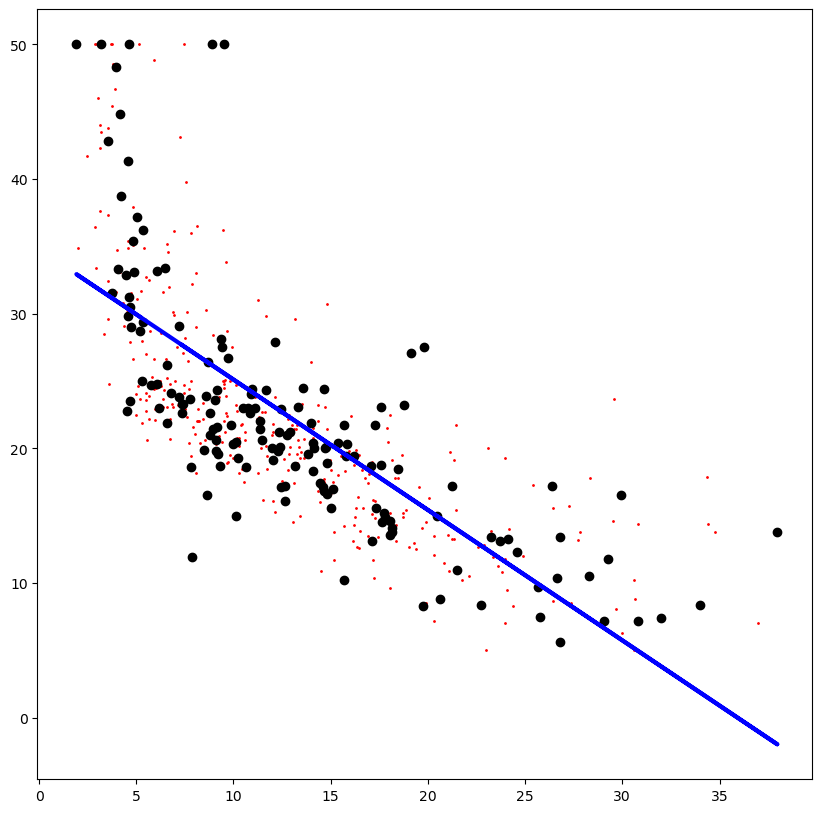

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train, color="red", s=1)
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, model.predict(x_test), color="blue",linewidth=3)
plt.show()